In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import nltk
import re
import string


from scipy.stats import norm
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)


import warnings
warnings.filterwarnings('ignore')

from textblob import TextBlob
from collections import Counter

In [2]:
data=pd.read_csv('E:\\DataSets\\covid19_tweets.csv')

In [3]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
user_name           179108 non-null object
user_location       142337 non-null object
user_description    168822 non-null object
user_created        179108 non-null object
user_followers      179108 non-null int64
user_friends        179108 non-null int64
user_favourites     179108 non-null int64
user_verified       179108 non-null bool
date                179108 non-null object
text                179108 non-null object
hashtags            127774 non-null object
source              179031 non-null object
is_retweet          179108 non-null bool
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [6]:
data.shape

(179108, 13)

In [8]:
data.describe(percentiles=[0.25,0.5,0.75,0.8,0.85,0.9,0.95])

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
80%,8.370000e+03,2207.000000,1.367000e+04
85%,1.562300e+04,3032.000000,2.076785e+04
90%,3.098200e+04,4444.000000,3.468130e+04


In [14]:
data.text

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

In [15]:
text=','.join(i for i in data.text if 'COVID' not in i and 'https' not in i and 'Covid' not in i)

In [16]:
text

'Praying for good health and recovery of @ChouhanShivraj .\n#covid19\n#covidPositive,Crazy that the world has come to this but as Americans we will fight to get through this!🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸 #covid19,Well one thing I learnt tonight. Crowd numbers at #AdelaideOval proves it’s not #covid19 keeping Crows supporters away.\n#weareportadelaide,#covid19 should be renamed to “the common core virus” because none of this math is adding up.,THE MOST NEGATIVE WORD NOW IS POSITIVE.\n#covid19,@Liz_Wheeler @realDonaldTrump thats shows #covid19 is a hoax and scam,Does he intend to use emergency powers to stop the voting and blame it on #covid19? Hmmm. \n\n#maddow,Save_Tax on Health_Insurance Premium under Section 80D. 📲 9845684754 #Starhealthinsurance #insurance #wilson #wilsonmenezes #covid19,@ians_india @MehboobaMufti how is this news #covid19,In Australia/6h: 1.#infinityleaked 2.#auspol 3.#covid19 4.#blm 5.#blacklivesmattters,@theimaginestan I’m pretty sure that’s how you spread #covid19 ... masks don’t 

In [17]:
wordcloud=WordCloud(max_words=200).generate(text)

Text(0.5, 1.0, 'Predominant words in tweets')

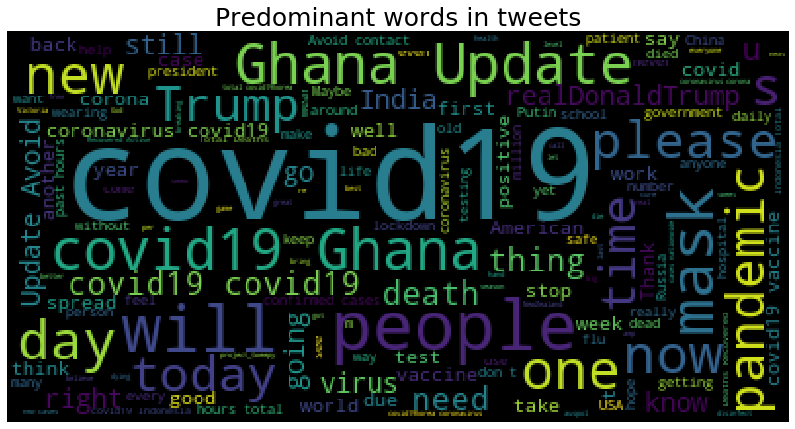

In [24]:
plt.figure(figsize=(14,14))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Predominant words in tweets',fontsize=25)


In [25]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [33]:
data.isna().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [26]:
data['user_location'].value_counts()

India                       3741
United States               2455
New Delhi, India            1721
Mumbai, India               1401
Washington, DC              1354
                            ... 
rw rw rw                       1
Delhi/Patna                    1
Harwell, Oxfordshire, UK       1
heartland,USA                  1
UT of Puducherry               1
Name: user_location, Length: 26920, dtype: int64

In [29]:
data['user_location'].value_counts().index.shape

(26920,)

In [30]:
data['user_location'].value_counts().values

array([3741, 2455, 1721, ...,    1,    1,    1], dtype=int64)

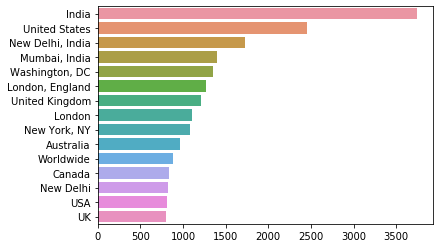

In [32]:
# Let's see the number of tweets by location


a=data['user_location'].value_counts()

sns.barplot(a.values[0:15],a.index[0:15])

In [46]:
# Let's see the users with maximum tweets

a=data['user_name'].value_counts()
a

GlobalPandemic.NET      679
Coronavirus Updates     625
covidnews.ch            402
Open Letters            390
Blood Donors India      282
                       ... 
MsBoozsa🖤✊🏿🏳️‍🌈❤️💪✌️      1
Wen                       1
Nebula IT                 1
ProICT LLC                1
IamDaksh sharma           1
Name: user_name, Length: 92276, dtype: int64

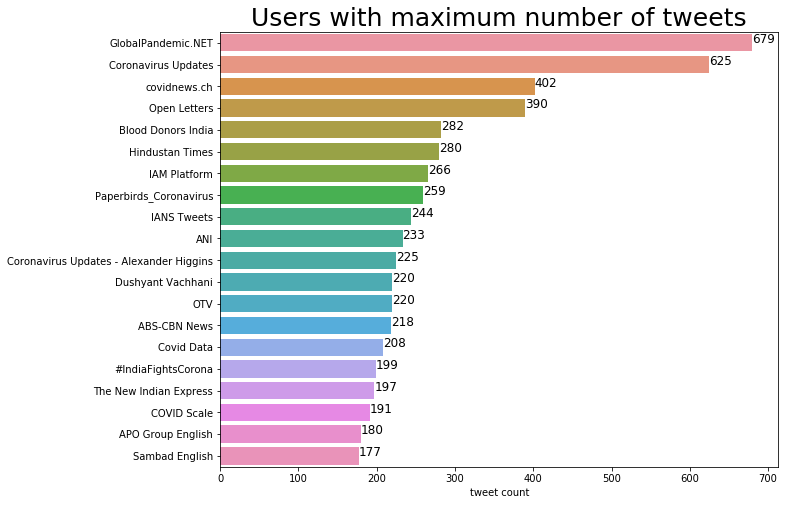

In [78]:
plt.figure(figsize=(10,8))
sns.barplot(a.head(20).values,a.head(20).index)

b=data['user_name'].value_counts().head(20).values
for index, value in enumerate(b):
    plt.text(value, index, str(value),fontsize=12)

plt.title('Users with maximum number of tweets',fontsize=25)
plt.xlabel('tweet count');

In [79]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [80]:
data.user_description

0         wednesday addams as a disney princess keepin i...
1         Husband, Father, Columnist & Commentator. Auth...
2         #Christian #Catholic #Conservative #Reagan #Re...
3         #Browns #Indians #ClevelandProud #[]_[] #Cavs ...
4         🖊️Official Twitter handle of Department of Inf...
                                ...                        
179103      Animal Scientist|| Muslim|| Real Madrid/Chelsea
179104    When your cat has more baking soda than Ninja ...
179105    ⚒️ The Architects of Free Trade ⚒️ Really Did ...
179106    Global UX UI Visual Designer. StoryTeller, Mus...
179107    TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...
Name: user_description, Length: 179108, dtype: object

In [83]:
data.user_favourites

0         18775
1            24
2          7254
3          1488
4           101
          ...  
179103     1062
179104     7295
179105    98000
179106        0
179107      566
Name: user_favourites, Length: 179108, dtype: int64

In [85]:
data.user_verified.value_counts()

False    156013
True      23095
Name: user_verified, dtype: int64

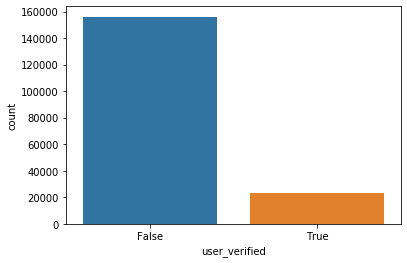

In [91]:
sns.countplot(data.user_verified)

In [94]:
data.text

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

In [96]:
data.hashtags.value_counts()

['COVID19']                                                                              37792
['Covid19']                                                                               4834
['covid19']                                                                               3124
['coronavirus', 'CoronaVirusUpdate', 'COVID19', 'CoronavirusPandemic']                     624
['coronavirus']                                                                            550
                                                                                         ...  
['hendo', 'stagdo', 'Kent', 'socialdistancing']                                              1
['ALevelResults']                                                                            1
['COVID19', 'online', 'healthcare', 'customers', 'businesses', 'regulators']                 1
['COVID19', 'coronavirus', 'SaturdayThoughts', 'SaturdayMotivation', 'SaturdayVibes']        1
['COVID19', 'dexamethasone']                      

In [99]:
#Let's see the top 10 hashtags
a=data.hashtags.value_counts()[:10]
a

['COVID19']                                                               37792
['Covid19']                                                                4834
['covid19']                                                                3124
['coronavirus', 'CoronaVirusUpdate', 'COVID19', 'CoronavirusPandemic']      624
['coronavirus']                                                             550
['COVID19', 'coronavirus']                                                  519
['Coronavirus', 'COVID19']                                                  503
['coronavirus', 'COVID19']                                                  491
['CoronaVirusUpdates', 'COVID19']                                           319
['Coronavirus']                                                             262
Name: hashtags, dtype: int64

In [102]:
a.index

Index(['['COVID19']', '['Covid19']', '['covid19']',
       '['coronavirus', 'CoronaVirusUpdate', 'COVID19', 'CoronavirusPandemic']',
       '['coronavirus']', '['COVID19', 'coronavirus']',
       '['Coronavirus', 'COVID19']', '['coronavirus', 'COVID19']',
       '['CoronaVirusUpdates', 'COVID19']', '['Coronavirus']'],
      dtype='object')

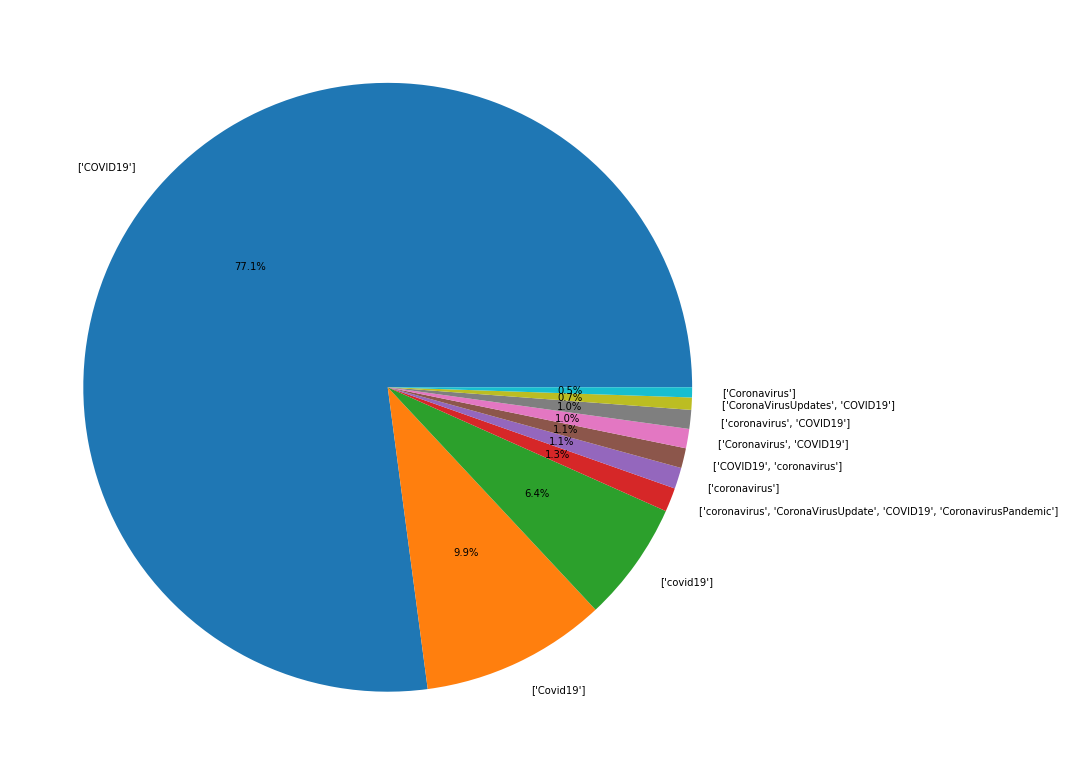

In [114]:
plt.figure(figsize=(14,14))
plt.pie(a,labels=a.index,autopct='%1.1f%%');

In [115]:
# Let's see the sources

data.source

0          Twitter for iPhone
1         Twitter for Android
2         Twitter for Android
3          Twitter for iPhone
4         Twitter for Android
                 ...         
179103    Twitter for Android
179104    Twitter for Android
179105        Twitter Web App
179106     Twitter for iPhone
179107    Twitter for Android
Name: source, Length: 179108, dtype: object

In [116]:
a=data.source.value_counts().sort_values(ascending=False)
a

Twitter Web App                  56891
Twitter for Android              40179
Twitter for iPhone               35472
TweetDeck                         8543
Hootsuite Inc.                    7321
                                 ...  
 autopo.st - @Radio_Lichfield        1
apherald                             1
Onollo Software                      1
crystalwind.ca                       1
News Users                           1
Name: source, Length: 610, dtype: int64

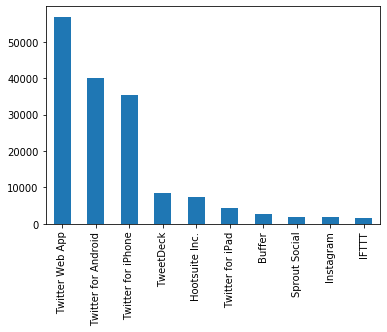

In [121]:
# Top ten sources
a[:10].plot.bar()

In [122]:
data.head(3)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False


In [125]:
data.user_location.unique()

array(['astroworld', 'New York, NY', 'Pewee Valley, KY', ...,
       'Newton, NJ', 'T.O.', 'Aliwal North, South Africa'], dtype=object)

In [128]:
data['source'][data['user_location']=='astroworld']

0     Twitter for iPhone
61    Twitter for iPhone
Name: source, dtype: object

In [135]:
# Let's see top 10 sources from india
a=data['source'][data['user_location']=='India'].value_counts()
a

Twitter Web App                   1733
Twitter for Android                789
TweetDeck                          632
Twitter for iPhone                 159
Hocalwire Social Share              79
Twitter Media Studio                67
Hootsuite Inc.                      44
Twitter Media Studio - LiveCut      39
SocialPilot.co                      30
Twitter for Advertisers             21
Zoho Social                         20
Instagram                           17
Sprinklr                            16
Microsoft Power Platform            12
Buffer                               9
Dynamic Signal                       9
Tumblr                               8
dailyindia                           7
LinkedIn                             7
LaterMedia                           4
TweetCaster for Android              4
Twitter for iPad                     4
WordPress.com                        4
Blog2Social APP                      3
Publer                               3
Google                   

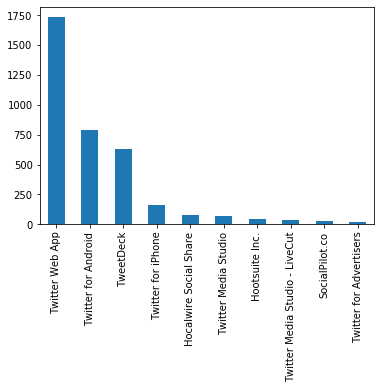

In [139]:
a[:10].plot.bar()

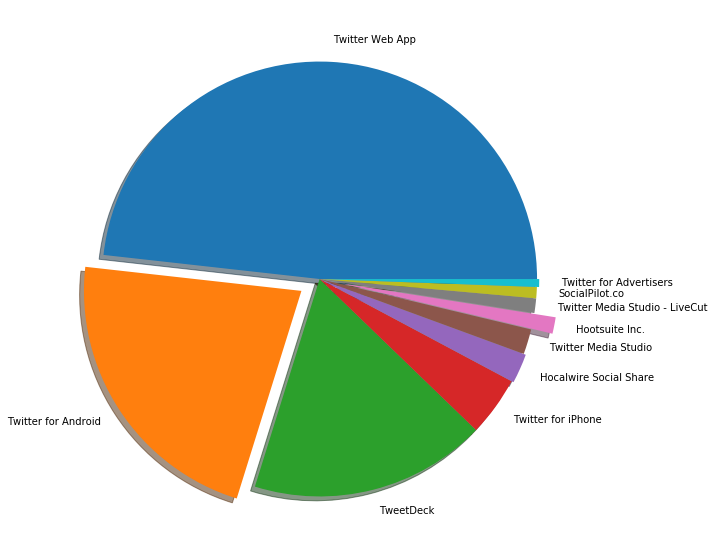

In [150]:
plt.figure(figsize=(12,10))
explode = (0, 0.1, 0, 0,0.01,0, 0.1, 0, 0,0.01) 
plt.pie(a[:10],labels=a[:10].index,explode = explode,shadow=True);

In [151]:
data.date

0         2020-07-25 12:27:21
1         2020-07-25 12:27:17
2         2020-07-25 12:27:14
3         2020-07-25 12:27:10
4         2020-07-25 12:27:08
                 ...         
179103    2020-08-29 19:44:21
179104    2020-08-29 19:44:16
179105    2020-08-29 19:44:15
179106    2020-08-29 19:44:14
179107    2020-08-29 19:44:08
Name: date, Length: 179108, dtype: object

In [155]:
#Let's convert the format

data.date=pd.to_datetime(data.date,format="%Y/%m/%d %H:%M:%S")

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
user_name           179108 non-null object
user_location       142337 non-null object
user_description    168822 non-null object
user_created        179108 non-null object
user_followers      179108 non-null int64
user_friends        179108 non-null int64
user_favourites     179108 non-null int64
user_verified       179108 non-null bool
date                179108 non-null datetime64[ns]
text                179108 non-null object
hashtags            127774 non-null object
source              179031 non-null object
is_retweet          179108 non-null bool
dtypes: bool(2), datetime64[ns](1), int64(3), object(7)
memory usage: 15.4+ MB


Text(0.5, 1.0, 'Num of tweets per day')

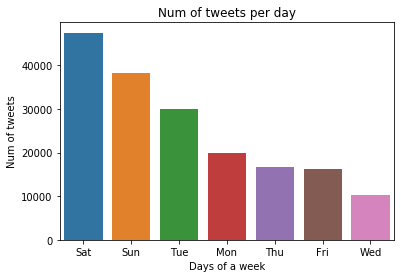

In [187]:
#Let's check the number of tweet per day
a=data['date'].dt.dayofweek.value_counts()
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
a.index=a.index.map(dmap)

sns.barplot(a.index,a.values)
plt.xlabel('Days of a week')
plt.ylabel('Num of tweets')
plt.title('Num of tweets per day')

we can see the maximum number of tweets are on saturday.

In [188]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [190]:
data.is_retweet.value_counts()

False    179108
Name: is_retweet, dtype: int64

In [201]:
# Let's pull the rows where hashtag is ['COVID19']

data.loc[data.hashtags=="['COVID19']"]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
12,SEXXYLYPPS,Hotel living - various cities! Who needs a ho...,"My ink ""My Way...No Regrets""\nAlways Make Happ...",2010-03-25 21:16:20,0,8,32,False,2020-07-25 12:26:47,👋🏻@PattyHajdu @NavdeepSBains — no one will be ...,['COVID19'],Twitter Web App,False
13,Africa Youth Advisory Board on DRR,Africa,Official account of the Africa Youth Advisory ...,2019-05-13 06:27:47,830,254,3692,False,2020-07-25 12:26:47,Let's all protect ourselves from #COVID19.\nIt...,['COVID19'],Twitter Web App,False
24,Florian Bieber,Graz,"Niko i ništa, professor, so-called Balkan expe...",2009-06-18 09:46:10,18145,1389,13578,False,2020-07-25 12:26:28,Holy water in times of #COVID19 https://t.co/Y...,['COVID19'],Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179087,ABS-CBN News,"Manila, Philippines","Stories, video, and multimedia for Filipinos w...",2008-08-16 10:09:33,7062635,1069,1169,True,2020-08-29 19:45:00,DOH warns public vs disclosing coronavirus pat...,['COVID19'],TweetDeck,False
179088,People's Post,"Cape Town, South Africa",FREE Weekly Circulation 318 495 | 10 Editions ...,2012-02-22 20:04:57,4019,1183,563,False,2020-08-29 19:45:00,"As a result of the #COVID19 pandemic, hundreds...",['COVID19'],TweetDeck,False
179095,Dave Akerly,"Lansing, MI",Host of the Morning Wake Up w/Dave Akerly @132...,2009-06-21 04:18:58,1275,1048,3922,False,2020-08-29 19:44:42,#COVID19 Update: 23 new cases today in the Tri...,['COVID19'],Twitter for iPhone,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False


In [203]:
#  Let's pull the rows where hashtag is ['WearAMask']
data.loc[data.hashtags=="['WearAMask']"]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
3908,Top Designs,NaN,We make the best T-Shirt designs for cheap pri...,2020-07-25 06:56:09,0,0,0,False,2020-07-25 10:03:37,"15% of these #WearAMask Shirts, Hoodies, and F...",['WearAMask'],Twitter for iPhone,False
11598,Cesar Centeno Jr🇵🇷,"Tampa, FL",Proud Dad and 100% Grade A Puertoriqueño. 🇵🇷 #...,2009-03-06 04:43:12,280,1136,57142,False,2020-07-25 04:26:19,The picture says it all...#WearAMask. I work a...,['WearAMask'],Twitter for Android,False
13583,KU Hospital News,"Kansas City, Kansas",Home of the Medical News Network with news fro...,2011-09-21 18:10:20,2899,1774,781,False,2020-07-25 02:34:55,Need convincing to #WearAMask? Just watch this...,['WearAMask'],Sprout Social,False
14929,Maria Lizardo,NaN,"Dominican 🇩🇴 Social Worker. Mom, wife, sister...",2009-07-23 15:18:46,1945,3370,23225,False,2020-07-25 01:23:10,@NYCComptroller Thanks for your generous donat...,['WearAMask'],Twitter for iPhone,False
15678,Alaina Nicolaides,NaN,NaN,2011-06-10 03:13:06,44,101,1108,False,2020-07-25 00:51:48,This sweet nurse took wonderful care of our li...,['WearAMask'],Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167580,Fed Min of Info & Cu,"FCT, Abuja",The official twitter account of The Federal Mi...,2011-12-10 15:11:26,221834,114,1088,False,2020-08-30 08:19:20,"As you worship today, #WearAMask, avoid sharin...",['WearAMask'],Twitter for iPhone,False
168866,Bonda Uma #StayHomeSaveLives,"Vijayawada, India",Indian Politician | Ex- MLA Vijayawada Central...,2017-03-10 14:16:12,19688,17,267,True,2020-08-30 07:13:31,Why I Urge Everyone to #WearAMask.\n\nPlease P...,['WearAMask'],Twitter Web App,False
171968,Brooklyn Coastal,United States,Welcome to our Shop!,2020-07-27 16:08:53,464,1272,124,False,2020-08-30 03:53:31,@odawa49 @Maltomash @AmerMedicalAssn @cdc @WHO...,['WearAMask'],Twitter for iPhone,False
178264,Halimah S.,"Ts, RTs & Follow ≠ Endorsment",Non-Partisan| Amateur Poet| Surgeon| Time Trav...,2010-06-15 20:41:00,5323,550,5365,False,2020-08-29 20:33:36,Thank you @AshiruAdamuA for nominating me to b...,['WearAMask'],Twitter for iPhone,False


In [204]:
# Let's pull the rows where hashtag is ['WearAMask'] & user_name is "KU Hospital News"
data.loc[(data.hashtags=="['WearAMask']") & (data.user_name=='KU Hospital News')]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
13583,KU Hospital News,"Kansas City, Kansas",Home of the Medical News Network with news fro...,2011-09-21 18:10:20,2899,1774,781,False,2020-07-25 02:34:55,Need convincing to #WearAMask? Just watch this...,['WearAMask'],Sprout Social,False


In this way, we can pull the information which we need

# Sentiment Analysis

In [205]:
senti_data=pd.read_csv('E:\\DataSets\\finalSentimentdata2.csv')
senti_data.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [206]:
senti_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 3 columns):
Unnamed: 0    3090 non-null int64
sentiment     3090 non-null object
text          3090 non-null object
dtypes: int64(1), object(2)
memory usage: 72.5+ KB


In [207]:
senti_data.shape

(3090, 3)

In [208]:
senti_data.describe()

,Unnamed: 0
count,3090.000000
mean,2689.072816
std,1438.624297
min,3.000000
25%,1368.250000
50%,3030.500000
75%,3949.750000
max,4722.000000


In [209]:
senti_data.columns

Index(['Unnamed: 0', 'sentiment', 'text'], dtype='object')

In [213]:
senti_data['sentiment'].unique()

array(['sad', 'joy', 'fear', 'anger'], dtype=object)

In [214]:
senti_data.sentiment.nunique()

4

In [215]:
senti_data.isna().sum()

Unnamed: 0    0
sentiment     0
text          0
dtype: int64

In [319]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to C:\Users\SYED YUNUS
[nltk_data]     AHMED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SYED YUNUS
[nltk_data]     AHMED\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [220]:
punc=string.punctuation
stop_words=set(stopwords.words('english'))
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()


In [222]:
#Let's get a quick understanding of regex which we will use further.
a='https://www.google.com/search?q=car&sxsrf=ALeKk00dWciS4Gve5-Ox56HDiPOtA5ai-Q:1610262348280&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiIrY7a5pDuAhXRR30KHULDCCAQ_AUoAnoECAUQBA&biw=1536&bih=722#imgrc=yTUc1B6nwrsI_M'
        

In [225]:
re.findall('\w+',a)

['https',
 'www',
 'google',
 'com',
 'search',
 'q',
 'car',
 'sxsrf',
 'ALeKk00dWciS4Gve5',
 'Ox56HDiPOtA5ai',
 'Q',
 '1610262348280',
 'source',
 'lnms',
 'tbm',
 'isch',
 'sa',
 'X',
 'ved',
 '2ahUKEwiIrY7a5pDuAhXRR30KHULDCCAQ_AUoAnoECAUQBA',
 'biw',
 '1536',
 'bih',
 '722',
 'imgrc',
 'yTUc1B6nwrsI_M']

In [236]:
re.findall('[0-9]+',a)

['00',
 '4',
 '5',
 '56',
 '5',
 '1610262348280',
 '2',
 '7',
 '5',
 '30',
 '1536',
 '722',
 '1',
 '6']

In [238]:
re.findall('https?://\S+|www\.\S+',a)

['https://www.google.com/search?q=car&sxsrf=ALeKk00dWciS4Gve5-Ox56HDiPOtA5ai-Q:1610262348280&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiIrY7a5pDuAhXRR30KHULDCCAQ_AUoAnoECAUQBA&biw=1536&bih=722#imgrc=yTUc1B6nwrsI_M']

In [243]:
re.findall('\w*\d\w*',a)

['ALeKk00dWciS4Gve5',
 'Ox56HDiPOtA5ai',
 '1610262348280',
 '2ahUKEwiIrY7a5pDuAhXRR30KHULDCCAQ_AUoAnoECAUQBA',
 '1536',
 '722',
 'yTUc1B6nwrsI_M']

In [262]:
re.findall('\[.*?\]',text)

['[+1,409]', '[-372]', '[+1,474]', '[+190]', '[+1,760]', '[-328]']

In [275]:
re.findall('\[.*?\]',text)

['[+1,409]', '[-372]', '[+1,474]', '[+190]', '[+1,760]', '[-328]']

In [292]:
re.findall('https?',a)

['https']

In [297]:
re.findall('[%s]'%re.escape(punc),a)

[':',
 '/',
 '/',
 '.',
 '.',
 '/',
 '?',
 '=',
 '&',
 '=',
 '-',
 '-',
 ':',
 '&',
 '=',
 '&',
 '=',
 '&',
 '=',
 '&',
 '=',
 '_',
 '&',
 '=',
 '&',
 '=',
 '#',
 '=',
 '_']

In [305]:
re.findall('\w*\d\w*',a)

['ALeKk00dWciS4Gve5',
 'Ox56HDiPOtA5ai',
 '1610262348280',
 '2ahUKEwiIrY7a5pDuAhXRR30KHULDCCAQ_AUoAnoECAUQBA',
 '1536',
 '722',
 'yTUc1B6nwrsI_M']

In [315]:
b='https://www.google.com/search?<a1>q=car&sxsrf=ALeKk00dWciS4Gve5-Ox56HDiPOtA5ai-Q:1610262348280&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiIrY7a5pDuAhXRR30KHULDCCAQ_AUoAnoECAUQBA&biw=1536&bih=722#imgrc=yTUc1B6nwrsI_M'

re.findall('<.*?>+',b)

['<a1>']

In [316]:
[word for word in str(text).split() if word not in stop_words]  #These words are not present in stop_words

['Praying',
 'good',
 'health',
 'recovery',
 '@ChouhanShivraj',
 '.',
 '#covid19',
 '#covidPositive,Crazy',
 'world',
 'come',
 'Americans',
 'fight',
 'get',
 'this!🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸',
 '#covid19,Well',
 'one',
 'thing',
 'I',
 'learnt',
 'tonight.',
 'Crowd',
 'numbers',
 '#AdelaideOval',
 'proves',
 'it’s',
 '#covid19',
 'keeping',
 'Crows',
 'supporters',
 'away.',
 '#weareportadelaide,#covid19',
 'renamed',
 '“the',
 'common',
 'core',
 'virus”',
 'none',
 'math',
 'adding',
 'up.,THE',
 'MOST',
 'NEGATIVE',
 'WORD',
 'NOW',
 'IS',
 'POSITIVE.',
 '#covid19,@Liz_Wheeler',
 '@realDonaldTrump',
 'thats',
 'shows',
 '#covid19',
 'hoax',
 'scam,Does',
 'intend',
 'use',
 'emergency',
 'powers',
 'stop',
 'voting',
 'blame',
 '#covid19?',
 'Hmmm.',
 '#maddow,Save_Tax',
 'Health_Insurance',
 'Premium',
 'Section',
 '80D.',
 '📲',
 '9845684754',
 '#Starhealthinsurance',
 '#insurance',
 '#wilson',
 '#wilsonmenezes',
 '#covid19,@ians_india',
 '@MehboobaMufti',
 'news',
 '#covid19,In',
 'Australia/

In [317]:
c=" ".join([word for word in str(text).split() if word not in stop_words])
c

'Praying good health recovery @ChouhanShivraj . #covid19 #covidPositive,Crazy world come Americans fight get this!🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸 #covid19,Well one thing I learnt tonight. Crowd numbers #AdelaideOval proves it’s #covid19 keeping Crows supporters away. #weareportadelaide,#covid19 renamed “the common core virus” none math adding up.,THE MOST NEGATIVE WORD NOW IS POSITIVE. #covid19,@Liz_Wheeler @realDonaldTrump thats shows #covid19 hoax scam,Does intend use emergency powers stop voting blame #covid19? Hmmm. #maddow,Save_Tax Health_Insurance Premium Section 80D. 📲 9845684754 #Starhealthinsurance #insurance #wilson #wilsonmenezes #covid19,@ians_india @MehboobaMufti news #covid19,In Australia/6h: 1.#infinityleaked 2.#auspol 3.#covid19 4.#blm 5.#blacklivesmattters,@theimaginestan I’m pretty sure that’s spread #covid19 ... masks don’t work don’t practice social distancing,Do u ever forget part day ur ? #Quarantine #covid19,Save_Tax Health_Insurance Premium Section 80D. 📲 9845684754 #Starhealthinsur

In [320]:
e=[stemmer.stem(word) for word in text.split()]
e


['pray',
 'for',
 'good',
 'health',
 'and',
 'recoveri',
 'of',
 '@chouhanshivraj',
 '.',
 '#covid19',
 '#covidpositive,crazi',
 'that',
 'the',
 'world',
 'ha',
 'come',
 'to',
 'thi',
 'but',
 'as',
 'american',
 'we',
 'will',
 'fight',
 'to',
 'get',
 'through',
 'this!🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸',
 '#covid19,wel',
 'one',
 'thing',
 'I',
 'learnt',
 'tonight.',
 'crowd',
 'number',
 'at',
 '#adelaideov',
 'prove',
 'it’',
 'not',
 '#covid19',
 'keep',
 'crow',
 'support',
 'away.',
 '#weareportadelaide,#covid19',
 'should',
 'be',
 'renam',
 'to',
 '“the',
 'common',
 'core',
 'virus”',
 'becaus',
 'none',
 'of',
 'thi',
 'math',
 'is',
 'ad',
 'up.,th',
 'most',
 'neg',
 'word',
 'now',
 'IS',
 'positive.',
 '#covid19,@liz_wheel',
 '@realdonaldtrump',
 'that',
 'show',
 '#covid19',
 'is',
 'a',
 'hoax',
 'and',
 'scam,do',
 'he',
 'intend',
 'to',
 'use',
 'emerg',
 'power',
 'to',
 'stop',
 'the',
 'vote',
 'and',
 'blame',
 'it',
 'on',
 '#covid19?',
 'hmmm.',
 '#maddow,save_tax',
 'on',
 'hea

In [321]:
d=[lemmatizer.lemmatize(word) for word in text.split()]
d

['Praying',
 'for',
 'good',
 'health',
 'and',
 'recovery',
 'of',
 '@ChouhanShivraj',
 '.',
 '#covid19',
 '#covidPositive,Crazy',
 'that',
 'the',
 'world',
 'ha',
 'come',
 'to',
 'this',
 'but',
 'a',
 'Americans',
 'we',
 'will',
 'fight',
 'to',
 'get',
 'through',
 'this!🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸',
 '#covid19,Well',
 'one',
 'thing',
 'I',
 'learnt',
 'tonight.',
 'Crowd',
 'number',
 'at',
 '#AdelaideOval',
 'prof',
 'it’s',
 'not',
 '#covid19',
 'keeping',
 'Crows',
 'supporter',
 'away.',
 '#weareportadelaide,#covid19',
 'should',
 'be',
 'renamed',
 'to',
 '“the',
 'common',
 'core',
 'virus”',
 'because',
 'none',
 'of',
 'this',
 'math',
 'is',
 'adding',
 'up.,THE',
 'MOST',
 'NEGATIVE',
 'WORD',
 'NOW',
 'IS',
 'POSITIVE.',
 '#covid19,@Liz_Wheeler',
 '@realDonaldTrump',
 'thats',
 'show',
 '#covid19',
 'is',
 'a',
 'hoax',
 'and',
 'scam,Does',
 'he',
 'intend',
 'to',
 'use',
 'emergency',
 'power',
 'to',
 'stop',
 'the',
 'voting',
 'and',
 'blame',
 'it',
 'on',
 '#covid19?',
 'Hmm

In [322]:
#Let's create a function

def clean_text(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)  #removing text between square brackets.
    text=re.sub('https?://\S+|www\.\S+','',text) #removing links
    text=re.sub('[%s]'%re.escape(punc),'',text)  #removing special characters.
    text=re.sub('\n','',text) #removing \n
    text=re.sub('\w*\d\w*','',text)  #removing words containing numbers
    text = re.sub('<.*?>+', '', text) #removing anything that is between <> brackets
    
    text=" ".join([word for word in str(text).split() if word not in stop_words]) #Removing stopwords
    
    text=' '.join([stemmer.stem(word) for word in text.split()])   #Stemming
    
    text=' '.join([lemmatizer.lemmatize(word) for word in text.split()])  #Lemmatizing
    
    return text

senti_data['text']=senti_data['text'].apply(lambda x:clean_text(x))

In [325]:
senti_data['text']

0       agre poor india treat badli poor seek live sin...
1       could spent cuti vc sakshi n g h coast cross r...
2       natur conserv remain prioriti post corona bang...
3       coronaviru disappear itali show intellectu say...
4       uk record lowest daili viru death toll sinc st...
                              ...                        
3085    today year old bangladeshi male admit tree top...
3086    corona viru implor ceas activ april suggest de...
3087    issa date lockdown end inshaallah corona redheart
3088    death toll due covid rose jammu kashmir third ...
3089    rate becom barrier poor peopl think cure treat...
Name: text, Length: 3090, dtype: object

In [326]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

senti_data['text']=senti_data['text'].apply(lambda x: remove_emoji(x))

In [327]:
senti_data.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agre poor india treat badli poor seek live sin...
1,1431,joy,could spent cuti vc sakshi n g h coast cross r...
2,654,joy,natur conserv remain prioriti post corona bang...
3,2530,sad,coronaviru disappear itali show intellectu say...
4,2296,sad,uk record lowest daili viru death toll sinc st...


In [331]:
#Let's split the data

from sklearn.model_selection import train_test_split

train,test=train_test_split(senti_data,test_size=0.25,random_state=0,stratify = senti_data.sentiment.values)

In [332]:
train.shape

(2317, 3)

In [333]:
test.shape

(773, 3)

# Vectorizing

In [357]:
from sklearn.feature_extraction.text import CountVectorizer

stop = list(stopwords.words('english'))
Count_vec = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train_c = Count_vec.fit_transform(train.text.values)
X_valid_c = Count_vec.transform(test.text.values)

y_train = train.sentiment.values
y_valid = test.sentiment.values

print("X_train.shape : ", X_train_c.shape)
print("X_valid.shape : ", X_valid_c.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (2317, 6306)
X_valid.shape :  (773, 6306)
y_train.shape :  (2317,)
y_valid.shape :  (773,)


## Logistic Regression

In [360]:

logreg = LogisticRegression()

logreg.fit(X_train_c, y_train)

logreg_prediction = logreg.predict(X_valid_c)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train_c,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9840310746655158
Validation accuracy Score :  0.6972833117723156
              precision    recall  f1-score   support

       anger       0.60      0.64      0.62       180
        fear       0.59      0.66      0.62       180
         joy       0.83      0.72      0.77       210
         sad       0.78      0.76      0.77       203

    accuracy                           0.70       773
   macro avg       0.70      0.69      0.70       773
weighted avg       0.71      0.70      0.70       773



# Naive Bayes


In [386]:
from sklearn.naive_bayes import MultinomialNB

nb_clf=MultinomialNB().fit(X_train_c,y_train)
preds_nb=nb_clf.predict(X_valid_c)
nb_accuracy=accuracy_score(y_valid,preds_nb)

print('Training score : ',nb_clf.score(X_train_c,y_train))
print('Test score : ',nb_clf.score(X_valid_c,y_valid))
print(classification_report(preds_nb,y_valid))

Training score :  0.9335347432024169
Test score :  0.685640362225097
              precision    recall  f1-score   support

       anger       0.54      0.68      0.60       151
        fear       0.65      0.56      0.60       229
         joy       0.70      0.83      0.76       154
         sad       0.85      0.71      0.78       239

    accuracy                           0.69       773
   macro avg       0.68      0.70      0.69       773
weighted avg       0.70      0.69      0.69       773



# Stochastic Gradient Classifier

In [387]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(penalty='l1',random_state=0).fit(X_train_c,y_train)
preds_sgd=sgd_clf.predict(X_valid_c)
sgd_accuracy=accuracy_score(y_valid,preds_sgd)

print('Training score : ',sgd_clf.score(X_train_c,y_train))
print('Test score : ',sgd_clf.score(X_valid_c,y_valid))
print(classification_report(preds_sgd,y_valid))

Training score :  0.9982736296935693
Test score :  0.6597671410090556
              precision    recall  f1-score   support

       anger       0.53      0.59      0.56       173
        fear       0.57      0.63      0.60       183
         joy       0.73      0.75      0.74       177
         sad       0.81      0.67      0.73       240

    accuracy                           0.66       773
   macro avg       0.66      0.66      0.66       773
weighted avg       0.67      0.66      0.66       773



## Random Forest Classifier

In [388]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=200,max_depth=10,random_state=0).fit(X_train_c,y_train)

preds_rf=rf_clf.predict(X_valid_c)
rf_accuracy=accuracy_score(y_valid,preds_rf)

print('Training score : ',rf_clf.score(X_train_c,y_train))
print('Test score : ',rf_clf.score(X_valid_c,y_valid))
print(classification_report(preds_rf,y_valid))

Training score :  0.7936987483815279
Test score :  0.6222509702457956
              precision    recall  f1-score   support

       anger       0.36      0.69      0.48       101
        fear       0.74      0.49      0.59       305
         joy       0.57      0.81      0.67       128
         sad       0.80      0.67      0.73       239

    accuracy                           0.62       773
   macro avg       0.62      0.66      0.62       773
weighted avg       0.68      0.62      0.63       773



In [390]:
results=pd.DataFrame({'Model':['Logistic Regression','Naive Bayes','Stochastic Gradient Classifier','Random FOrest'],
                     'Test Accuracy':[logreg_accuracy,nb_accuracy,sgd_accuracy,rf_accuracy]})
results.sort_values(by='Test Accuracy',ascending=False)

,Model,Test Accuracy
0,Logistic Regression,0.697283
1,Naive Bayes,0.685640
2,Stochastic Gradient Classifier,0.659767
3,Random FOrest,0.622251
